In [5]:
from models.model3 import linear_multiplicative_cooling, linear_additive_cooling, logarithmic_multiplicative_cooling
from models.model3 import BaseModel
from src.variables import sector, K, demands, coords, T, EM,a , b, service_time, N, Q_MAX
from src.graph import draw_graph
import time
import numpy as np

In [6]:
sector

,Punto de colecta,Latitud,Longitud,X_Longitude,Y_Latitude,UTM_X,UTM_Y,X,Y,demanda,service_time,a,b
0,d1,"8°07'34""S","79°01'47""W",8.126111,79.029722,717097.121783,9.101233e+06,717.097122,9101.232538,0,0.5,4,15
1,pc1,"8°07'52""S","79°02'00""W",8.131111,79.033333,716696.391133,9.100681e+06,716.696391,9100.681396,1,0.5,7,12
2,pc2,"8°07'48""S","79°01'59""W",8.130000,79.033056,716727.606565,9.100804e+06,716.727607,9100.804153,1,0.5,8,12
3,pc3,"8°07'45""S","79°01'58""W",8.129167,79.032778,716758.672853,9.100896e+06,716.758673,9100.896184,1,0.5,10,14
4,pc4,"8°07'42""S","79°02'04""W",8.128333,79.034444,716575.408573,9.100989e+06,716.575409,9100.989255,1,0.5,10,14
5,pc5,"8°07'47""S","79°02'06""W",8.129722,79.035000,716513.425949,9.100836e+06,716.513426,9100.835920,1,0.5,7,13
6,pc6,"8°07'51""S","79°01'53""W",8.130833,79.031389,716910.869825,9.100711e+06,716.910870,9100.711081,2,0.5,6,12
7,pc7,"8°07'50""S","79°01'47""W",8.130556,79.029722,717094.730484,9.100741e+06,717.094730,9100.740914,2,0.5,6,10
8,pc8,"8°07'46""S","79°01'49""W",8.129444,79.030278,717034.091147,9.100864e+06,717.034091,9100.864118,2,0.5,7,9
9,pc9,"8°07'52""S","79°01'45""W",8.131111,79.029167,717155.668531,9.100679e+06,717.155669,9100.679163,1,0.5,8,11


In [3]:
K

array([0, 1, 2, 3, 4, 5])

In [7]:
model = BaseModel()

created


In [8]:
start_time = time.time()
x0 = model.nearestNeighborHeuristic(50)
elapsed_time = time.time() - start_time
print("Tiempo de ejecución:", elapsed_time, "segundos")
print(x0)

Tiempo de ejecución: 0.022359609603881836 segundos
[30 48 44 27  8  7 24 16 19 35 34 31 20 18 42  5  4  3 11 28 36 29 21  9
 41 45 47 49  2  1 10 15 14 26 39  6 23 22 43 17 25 38 46 50 37 40 13 32
 12 33]


In [14]:
model.objective_function(x0)

1.9136323820288639

In [9]:
initial_route, df_summary = model.decoding(x0, summary=True)
df_summary

,Vehiculo,Nodoi-1,Nodoi,Distancia,TiempoArco,TW_A,TW_B,Tanque,CO2
0,0,0,30,1.079356,0.026984,5,8,0.970000,0.030000
1,0,30,48,1.498197,0.037455,5,8,0.928359,0.041641
2,0,48,44,0.456063,0.011402,5,9,0.915683,0.012676
3,0,44,27,0.864886,0.021622,4,9,0.891645,0.024039
4,0,27,8,1.015834,0.025396,7,9,0.863410,0.028234
5,0,8,7,0.137318,0.003433,6,10,0.859594,0.003817
6,0,7,24,0.727879,0.018197,6,10,0.839363,0.020231
7,0,24,16,0.358538,0.008963,5,10,0.829398,0.009965
8,0,16,19,0.717255,0.017931,9,10,0.809462,0.019935
9,0,19,35,0.222975,0.005574,5,10,0.803265,0.006197


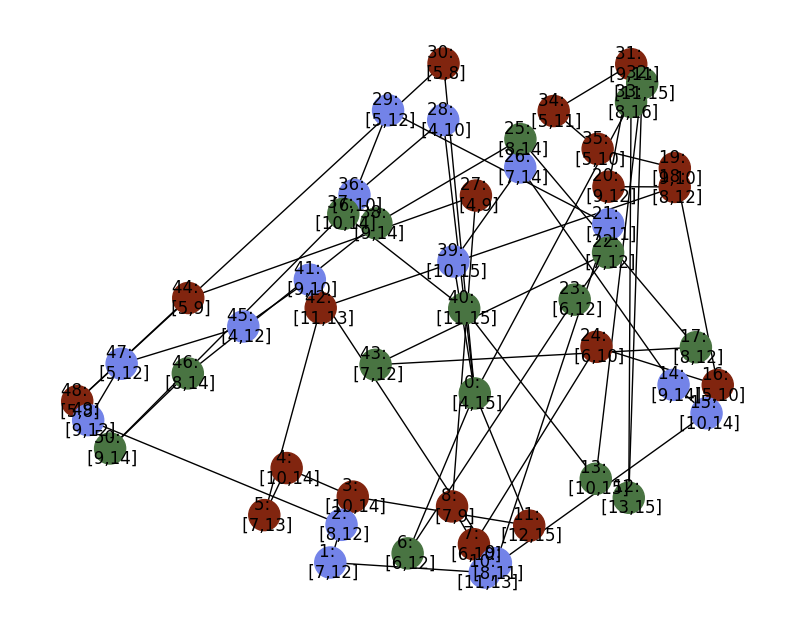

In [10]:
draw_graph(initial_route)

In [13]:
start_time = time.time()
info = model.ga(
    x0= x0,
    PopSize= 100,
    ElitePopSize= 10,
    subPopSize=20,
    MaxGenerations= 100,
    localOptimumTime= 20
)
elapsed_time = time.time() - start_time
print("Tiempo de ejecución:", elapsed_time, "segundos")
print(x0)

generation: 1
generation: 2
generation: 3
generation: 4
generation: 5
generation: 6
generation: 7
generation: 8
generation: 9
generation: 10
generation: 11
generation: 12
generation: 13
generation: 14
generation: 15
generation: 16
generation: 17
generation: 18
generation: 19
generation: 20
generation: 21
generation: 22
generation: 23
generation: 24
generation: 25
generation: 26
generation: 27
generation: 28
generation: 29
generation: 30
generation: 31
generation: 32
generation: 33
generation: 34
generation: 35
generation: 36
generation: 37
generation: 38
generation: 39
generation: 40
generation: 41
generation: 42
generation: 43
generation: 44
generation: 45
generation: 46
generation: 47
generation: 48
generation: 49
generation: 50
generation: 51
generation: 52
generation: 53
generation: 54
generation: 55
generation: 56
generation: 57
generation: 58
generation: 59
generation: 60
generation: 61
Tiempo de ejecución: 78.95273351669312 segundos
[30 48 44 27  8  7 24 16 19 35 34 31 20 18 42 

In [15]:
print(info['x_best'])
print(info['e_best'])

[43 48 44 37 40 16 24 17 19 35 34 31 18 20 42  5  4  3 11 23 22 21 27 41
 45 47 46 49 50 10 15 14 12 13 30 29 28 36 38 39  8  9  7  2  1  6 25 32
 33 26]
1.2505429129714816


In [12]:
optimal_route, df_summary2 = model.decoding(info['x_best'], summary=True)
df_summary2

,Vehiculo,Nodoi-1,Nodoi,Distancia,TiempoArco,TW_A,TW_B,Tanque,CO2
0,0,0,48,1.102718,0.027568,5,8,0.969351,0.030649
1,0,48,44,0.456063,0.011402,5,9,0.956675,0.012676
2,0,44,36,0.570254,0.014256,6,10,0.940825,0.015850
3,0,36,28,0.347029,0.008676,4,10,0.931180,0.009645
4,0,28,24,0.852988,0.021325,6,10,0.907472,0.023708
5,0,24,16,0.358538,0.008963,5,10,0.897507,0.009965
6,0,16,19,0.717255,0.017931,9,10,0.877571,0.019935
7,0,19,35,0.222975,0.005574,5,10,0.871374,0.006197
8,0,35,34,0.173515,0.004338,5,11,0.866551,0.004823
9,0,34,31,0.263714,0.006593,9,11,0.859221,0.007330


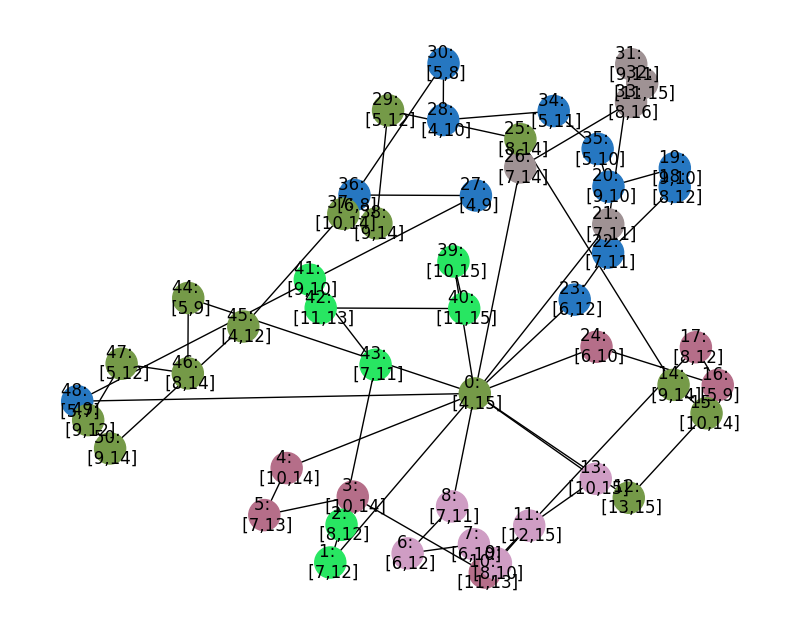

In [261]:
draw_graph(optimal_route)

In [262]:
model.draw_energy_plot(info['hist'])

## VEGSA

In [16]:

start_time = time.time()
Tmax = 300 
Tmin = 0
StepMax = 300
information = model.vegsa(
    x0= x0,
    PopSize= 100,
    ElitePopSize= 10,
    subPopSize=20,
    MaxGenerations= 150,
    localOptimumTime= 25,
    StepMax= StepMax,
    Tmin= Tmin,
    Tmax= Tmax,
    SAlocalEntropyTime= 25,
    cooling_operator= linear_additive_cooling(t_max=Tmax, t_min=Tmin, alpha=0.9, step_max=StepMax)
)
elapsed_time = time.time() - start_time
print("Tiempo de ejecución:", elapsed_time, "segundos")


GA init: 
generation: 1
generation: 2
generation: 3
generation: 4
generation: 5
generation: 6
generation: 7
generation: 8
generation: 9
generation: 10
generation: 11
generation: 12
generation: 13
generation: 14
generation: 15
generation: 16
generation: 17
generation: 18
generation: 19
generation: 20
generation: 21
generation: 22
generation: 23
generation: 24
generation: 25
generation: 26
generation: 27
generation: 28
generation: 29
generation: 30
generation: 31
generation: 32
generation: 33
generation: 34
generation: 35
generation: 36
generation: 37
generation: 38
generation: 39
generation: 40
generation: 41
generation: 42
generation: 43
generation: 44
generation: 45
generation: 46
generation: 47
generation: 48
generation: 49
generation: 50
generation: 51
generation: 52
generation: 53
generation: 54
generation: 55
generation: 56
generation: 57
generation: 58
generation: 59
generation: 60
generation: 61
generation: 62
generation: 63
generation: 64
generation: 65
generation: 66
generatio

In [17]:
print(information['x_best'])
print(information['e_best'])
print(information['temperature'])
print(information['time'])

[48 44 36 23 24 22 21 35 34 31 32 20 37 38  2  5  1  7  9 10 12 13 27 29
 30 28 41 47 49 50  4  3 11 15 14  8  6 16 17 18 19 33 43 46 45 42 25 26
 39 40]
1.1719749767869703
0.0
301


In [18]:
optimal_route3, df_summary3 = model.decoding(information['x_best'], summary=True)
df_summary3

,Vehiculo,Nodoi-1,Nodoi,Distancia,TiempoArco,TW_A,TW_B,Tanque,CO2
0,0,0,48,1.102718,0.027568,5,8,0.969351,0.030649
1,0,48,44,0.456063,0.011402,5,9,0.956675,0.012676
2,0,44,36,0.570254,0.014256,6,10,0.940825,0.015850
3,0,36,23,0.699474,0.017487,6,12,0.921384,0.019441
4,0,23,24,0.165390,0.004135,6,10,0.916787,0.004597
5,0,24,22,0.308791,0.007720,7,12,0.908205,0.008583
6,0,22,21,0.092181,0.002305,7,11,0.905643,0.002562
7,0,21,35,0.247715,0.006193,5,10,0.898758,0.006885
8,0,35,34,0.173515,0.004338,5,11,0.893935,0.004823
9,0,34,31,0.263714,0.006593,9,11,0.886605,0.007330


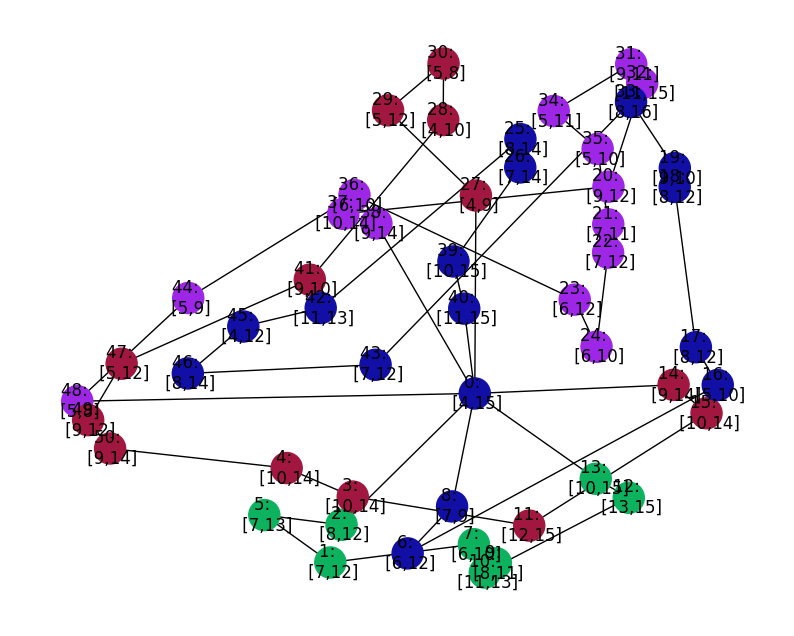

In [26]:
draw_graph(optimal_route3)

In [289]:
model.draw_energy_plot(information['hist'])